In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
sns.set()

## 5.2 Scikit-Learn 简介

### 5.2.1 Scikit-Learn 的数据表示

#### 1.数据表

In [9]:
iris = sns.load_dataset("iris")

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3.目标数组

<IPython.core.display.Javascript object>


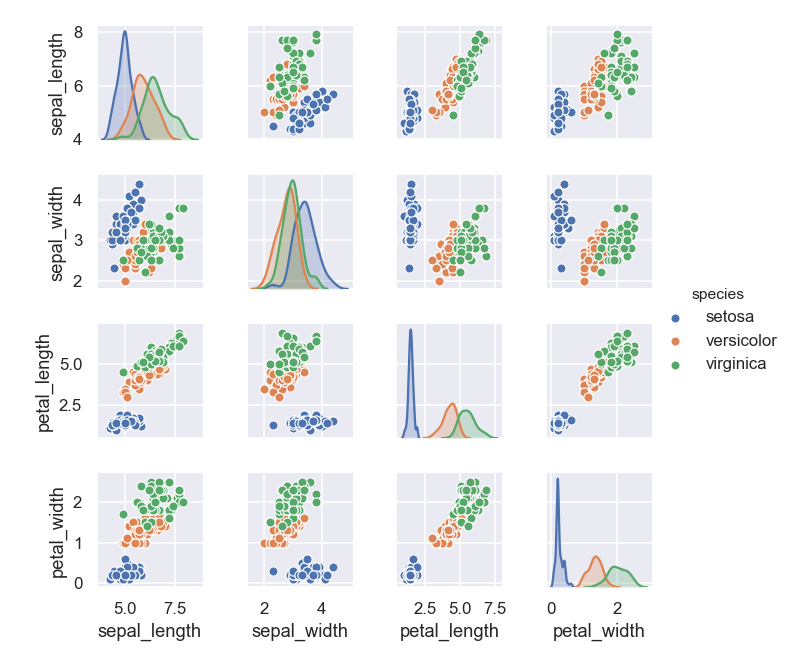

In [11]:
sns.set()
# sns.pairplot(iris, hue='species', size=1.5)
sns.pairplot(iris, hue='species', height=1.5)

In [12]:
# 从 DataFrame 中抽取特征矩阵和目标数组

X_iris = iris.drop('species', axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

### 5.2.2 Scikit-Learn 的评估器API

#### 2.有监督学习示例：简单线性回归

<IPython.core.display.Javascript object>


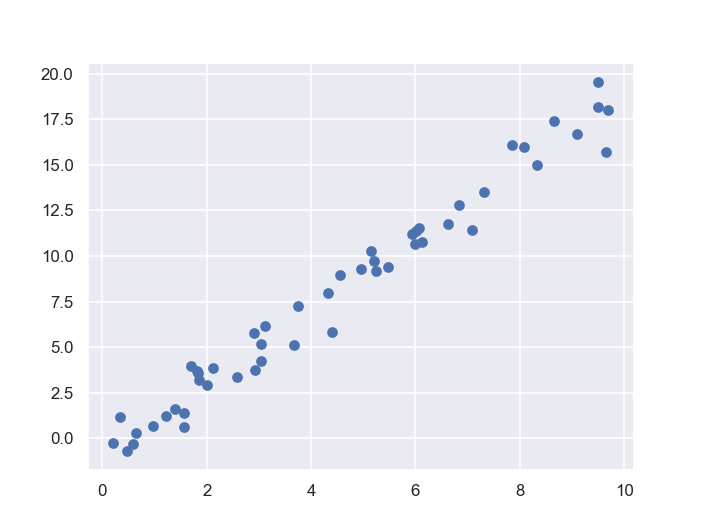

In [15]:
plt.figure()
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)  # rand : 产生 [0, 1) 均匀分布
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

(1) 选择模型类

In [42]:
from sklearn.linear_model import LinearRegression

(2) 选择模型超参数

In [43]:
# 实例化 LinearRegression 类并用 fit_intercept 超参数设置是否想要拟合直线的截距

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(3) 将数据整理成特征矩阵和目标数组

In [44]:
X = x[ :, np.newaxis]
X.shape

(50, 1)

(4) 用模型拟合数据

In [45]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.coef_

array([1.9776566])

In [47]:
model.intercept_

-0.9033107255311164

(5) 预测新数据的标签

In [48]:
xfit = np.linspace(-1, 11)

In [49]:
# 首先，将这些 x 值转换成 [n_samples, n_features] 的特征矩阵形式，之后将其输入到模型中

Xfit = xfit[ : , np.newaxis]
yfit = model.predict(Xfit)

<IPython.core.display.Javascript object>


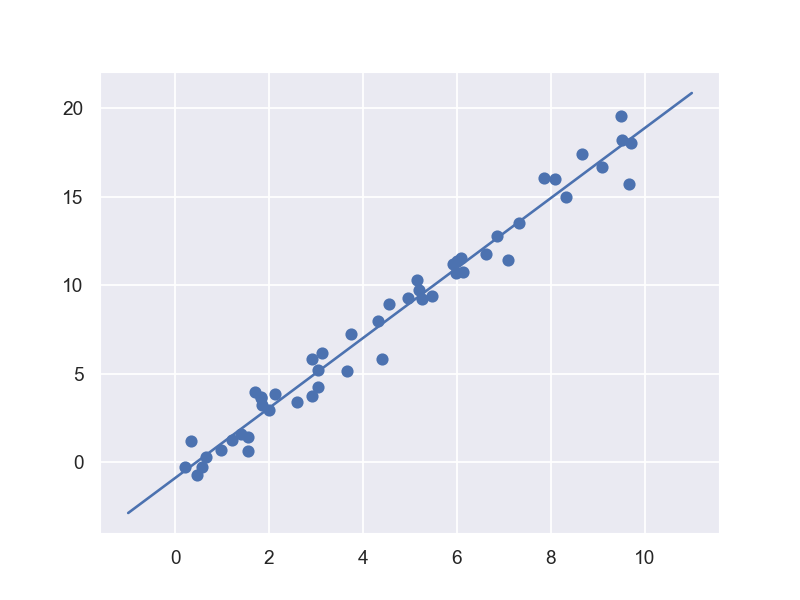

In [50]:
# 最后，把原始数据和拟合结果都可视化出来

plt.figure()
plt.scatter(x, y)
plt.plot(Xfit, yfit)

#### 3.有监督学习示例：鸢尾花数据分类

In [3]:
# train_test_split(): 将数据分割成训练集(training set)和测试集(testing set)

import seaborn as sns
from sklearn.model_selection import train_test_split

iris = sns.load_dataset("iris")
X_iris = iris.drop("species", axis=1)
y_iris = iris["species"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [52]:
# 预测标签

from sklearn.naive_bayes import GaussianNB  # 1. 选择模型类

model = GaussianNB()                       # 2. 初始化模型
model.fit(Xtrain, ytrain)                  # 3. 用模型拟合数据
y_model = model.predict(Xtest)              # 4. 对新数据进行预测

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

#### 4.无监督学习示例：鸢尾花数据降维

In [54]:
# 使用主成分分析(principal component analysis, PCA)

from sklearn.decomposition import PCA  # 1. 选择模型类
model = PCA(n_components=2)            # 2. 设置超参数，初始化模型
model.fit(X_iris)                      # 3. 拟合数据，注意这里不用 y 变量
X_2D = model.transform(X_iris)         # 4. 将数据转换为二维

<IPython.core.display.Javascript object>


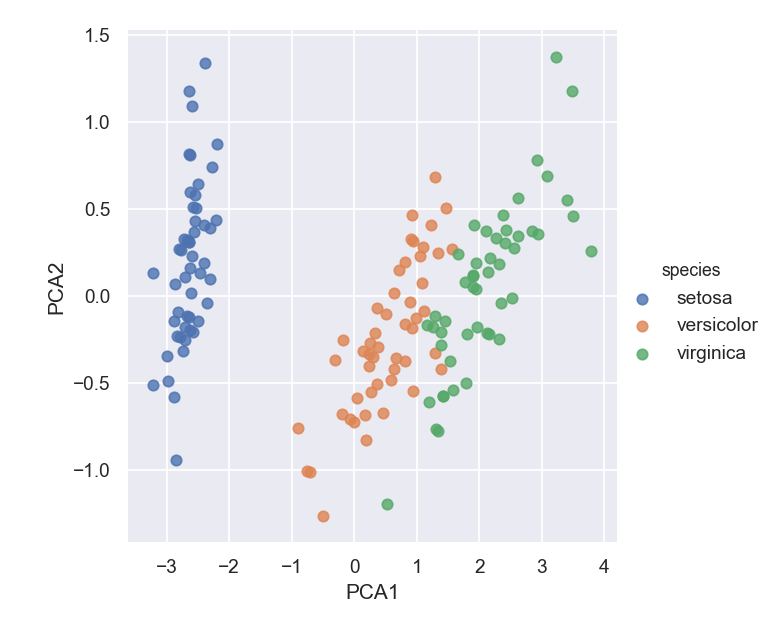

In [55]:
iris['PCA1'] = X_2D[ : , 0]
iris['PCA2'] = X_2D[ : , 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

#### 5.无监督学习示例：鸢尾花数据聚类

In [56]:
# 拟合高斯混合模型
# ImportError: cannot import name 'GMM' from 'sklearn.mixture' \

from sklearn.mixture import GaussianMixture                      # 1. 选择模型类
model = GaussianMixture(n_components=3, covariance_type='full')  # 2. 设置超参数，初始化模型
model.fit(X_iris)                                                # 3. 拟合数据，注意不需要 y 变量
y_gmm = model.predict(X_iris)                                    # 4. 确定簇标签

<IPython.core.display.Javascript object>


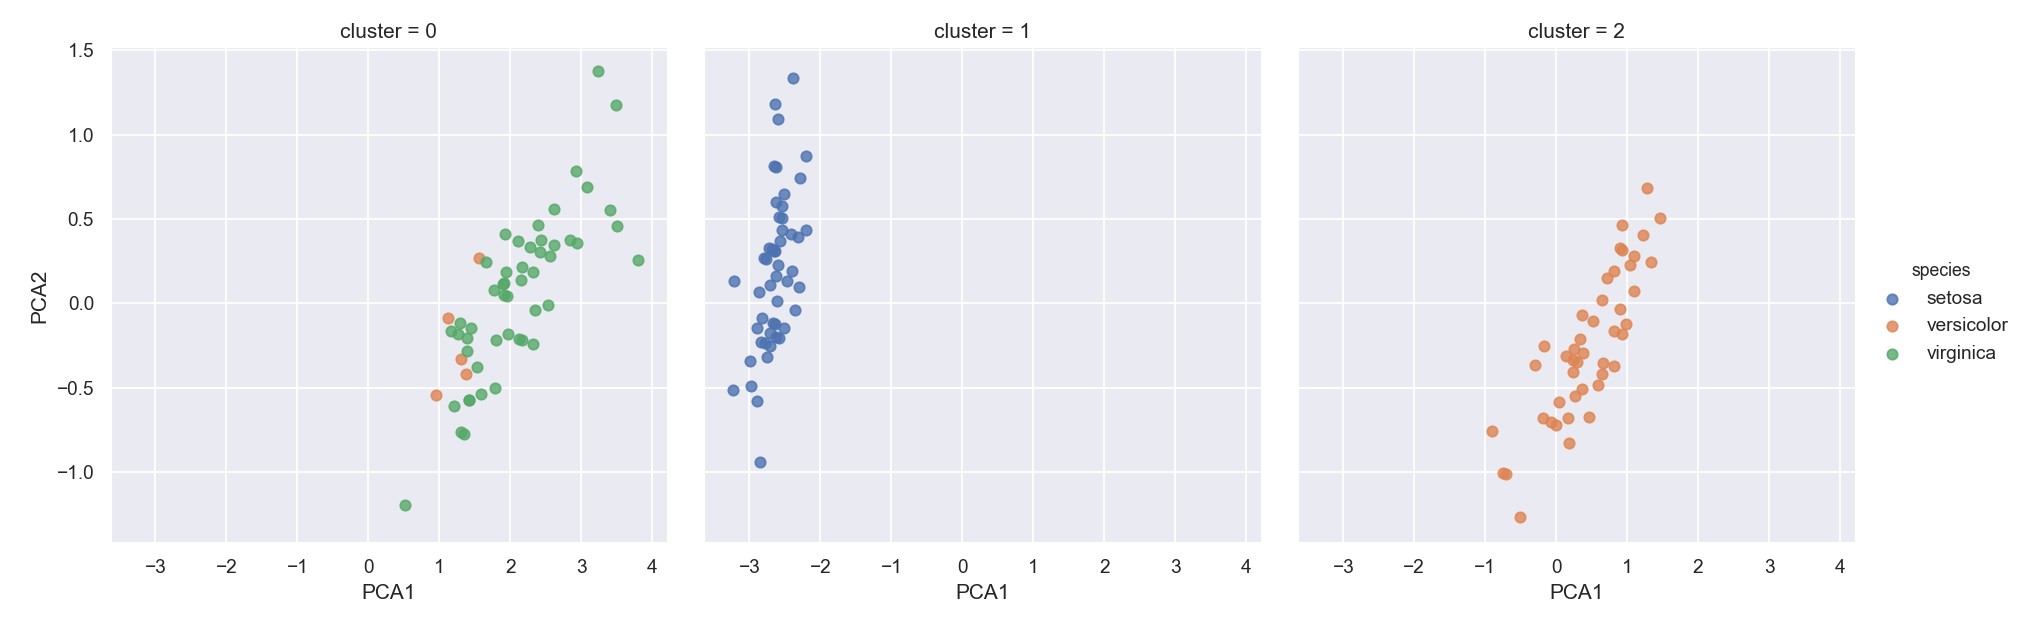

In [57]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

### 5.2.3 应用：手写数字探索

#### 1. 加载并可视化手写数字

In [58]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

<IPython.core.display.Javascript object>


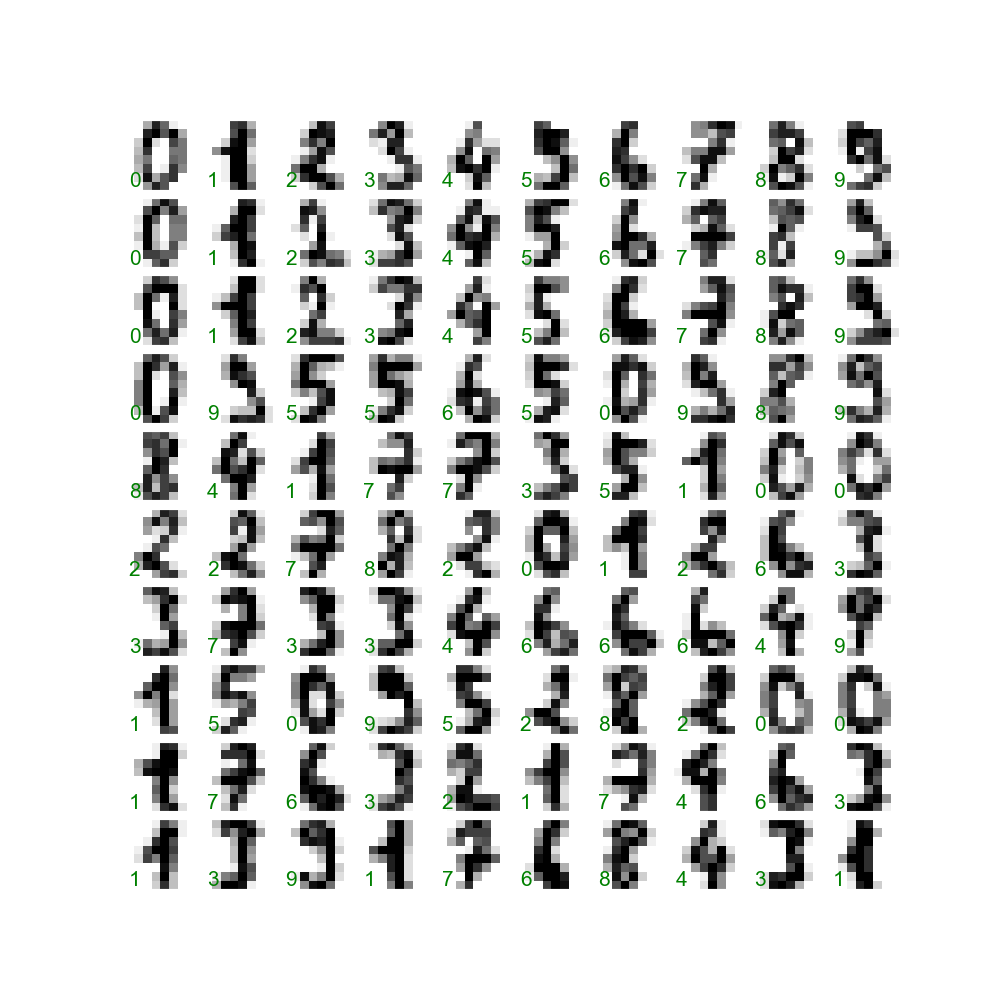

In [59]:
# 对前 100 张图进行可视化

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [60]:
X = digits.data
X.shape

(1797, 64)

In [61]:
y = digits.target
y.shape

(1797,)

#### 2.无监督学习：降维

In [62]:
# 用流形学习算法中的 Isomap 算法对数据进行降维

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

<IPython.core.display.Javascript object>


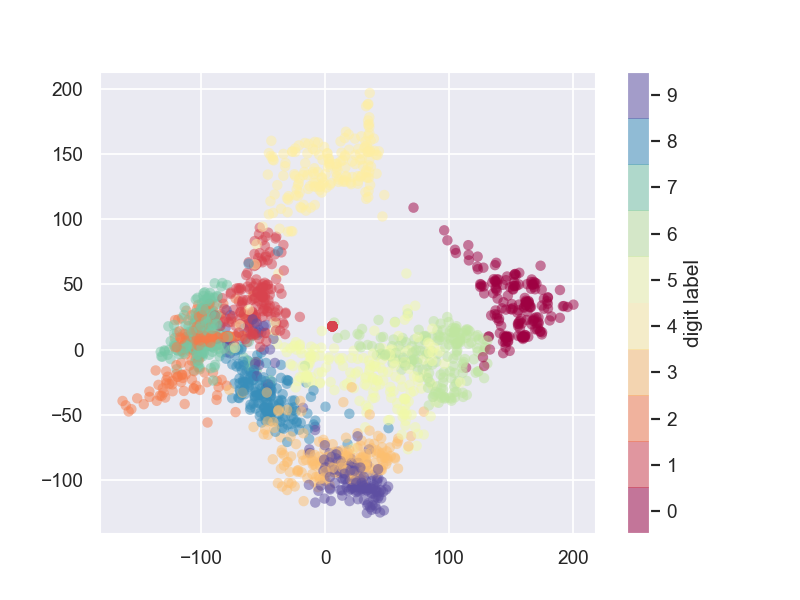

In [63]:
plt.figure()
plt.scatter(data_projected[ : , 0], data_projected[ : , 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

#### 3. 数字分类

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [65]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

<IPython.core.display.Javascript object>


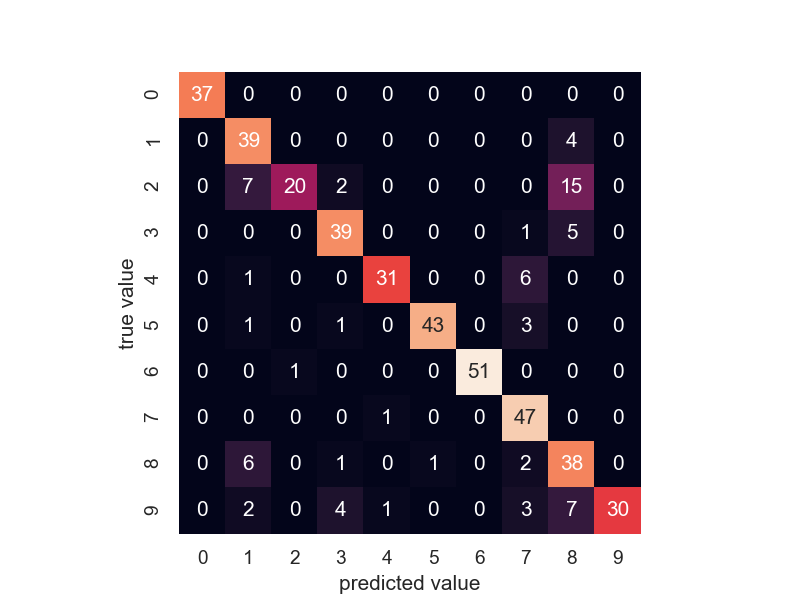

Text(110.45000000000003, 0.5, 'true value')

In [67]:
# 用 scikit-learn 计算混淆矩阵

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

plt.figure()
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")

<IPython.core.display.Javascript object>


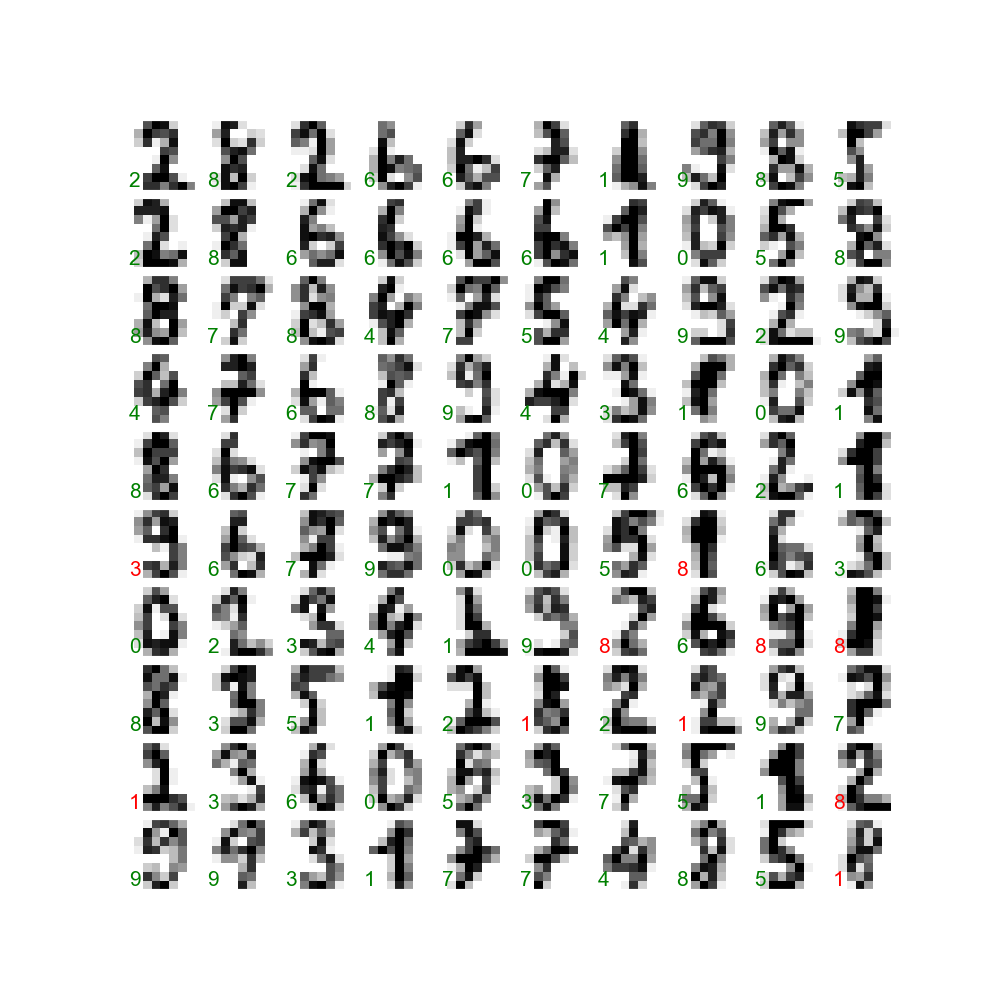

In [68]:
# 将样本画出来，然后把预测标签放在左下角，用绿色表示预测正确，用红色表示预测错误

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')